In [4]:
import pandas as pd
import os

# Load data sets

In [9]:
dir_path = "./data/Takeout/Fitbit/"

In [73]:
sleep_score =  pd.read_csv(dir_path+'Sleep Score/sleep_score.csv')

In [74]:
stress_score =  pd.read_csv(dir_path+'Stress Score/Stress Score.csv')


In [83]:
filenames = ['Daily Readiness Score - 2023-12-01.csv', 'Daily Readiness Score - 2024-01-01.csv', 'Daily Readiness Score - 2024-02-01.csv']
dfs = [pd.read_csv(dir_path+'Daily Readiness/' +filename) for filename in filenames]
daily_readiness = pd.concat([dfs[i] for i in range(len(dfs))], ignore_index=True)


In [52]:
filenames = ['Active Zone Minutes - 2023-12-01.csv', 'Active Zone Minutes - 2024-01-01.csv', 'Active Zone Minutes - 2024-02-01.csv']
dfs = [pd.read_csv(dir_path+'Active Zone Minutes (AZM)/' +filename) for filename in filenames]
activeZoneMinutes = pd.concat([dfs[i] for i in range(len(dfs))], ignore_index=True)


In [59]:
filenames = ['steps-2023-11-30.json', 'steps-2023-12-30.json', 'steps-2024-01-29.json']
dfs = [pd.read_json(dir_path+'Global Export Data/' +filename) for filename in filenames]
steps = pd.concat([dfs[i] for i in range(len(dfs))], ignore_index=True)


# Merge data sets

### 1. get standardized date feature

#### features per day:
- sleep_score
- stress_score
- daily_readiness

In [115]:
#sleep_score.head()
stress_score.head()
#daily_readiness.head()

,DATE,UPDATED_AT,STRESS_SCORE,SLEEP_POINTS,MAX_SLEEP_POINTS,RESPONSIVENESS_POINTS,MAX_RESPONSIVENESS_POINTS,EXERTION_POINTS,MAX_EXERTION_POINTS,STATUS,CALCULATION_FAILED,Date
0,2023-12-02,2023-12-02T07:40:54.289,0,0,0,0,0,0,0,NO_DATA,True,2023-12-02
1,2023-12-03,2023-12-03T08:33:24.925,70,24,30,21,30,25,40,READY,False,2023-12-03
2,2023-12-04,2023-12-04T08:30:16.707,63,19,30,23,30,21,40,READY,False,2023-12-04
3,2023-12-05,2023-12-05T07:15:30.522,68,23,30,23,30,22,40,READY,False,2023-12-05
4,2023-12-06,2023-12-07T06:17:27.159,71,25,30,21,30,25,40,READY,False,2023-12-06


In [102]:
# make the date bee same for all three

# sleep_score
sleep_score.timestamp = pd.to_datetime(sleep_score.timestamp)
sleep_score['Date'] = sleep_score.timestamp.apply(lambda x: x.strftime('%Y-%m-%d'))

# stress_score
stress_score.DATE = pd.to_datetime(stress_score.DATE)
stress_score['Date'] = stress_score.DATE.apply(lambda x: x.strftime('%Y-%m-%d'))


# readiness score
daily_readiness.date = pd.to_datetime(daily_readiness.date)
daily_readiness['Date'] = daily_readiness.date.apply(lambda x: x.strftime('%Y-%m-%d'))


### 2. merge on standardized date

In [104]:
df_days = pd.merge(sleep_score, stress_score, on='Date')

In [109]:
df_days = pd.merge(df_days, daily_readiness, on='Date')

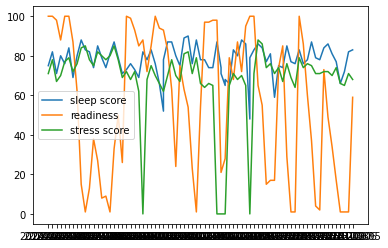

In [122]:
plt.plot(df_days.Date, df_days.overall_score, label='sleep score')
plt.plot(df_days.Date, df_days.readiness_score_value, label='readiness')
plt.plot(df_days.Date, df_days.STRESS_SCORE, label='stress score')
plt.legend()


#### features per Hour/Minute
- activeZoneMinutes
- steps
- temperature

In [123]:
activeZoneMinutes.head()

,date_time,heart_zone_id,total_minutes
0,2023-12-01T17:21,FAT_BURN,1
1,2023-12-01T17:22,FAT_BURN,1
2,2023-12-01T18:22,FAT_BURN,1
3,2023-12-01T18:23,FAT_BURN,1
4,2023-12-01T18:24,FAT_BURN,1


In [124]:
steps.head()

,dateTime,value
0,2023-12-01 15:26:00,0
1,2023-12-01 15:27:00,0
2,2023-12-01 15:28:00,0
3,2023-12-01 15:29:00,9
4,2023-12-01 15:30:00,0


In [125]:
temperature.head()

NameError: name 'temperature' is not defined